# Midterm Exam (part 3) - Computational Physics 2

- **Deadline: Friday 10th February 2023 (by the end of the day)**


- When you finish this part, please send the **.ipynb file** via email to wbanda@yachaytech.edu.ec


- **This part can be submitted individually or in pairs.** It includes application problems in physics.


- You can call your notebook with your surname/s, e.g. **name/s-midterm-p3.ipynb**, and also include your name/s on the notebook.


## Instructions:


- Within a single python notebook, solve the following problems using python code:

## Name:

Andres Villares

### 12. (5 points) Euler methods: Electric circuit

Consider the electric circuit of the figure below. The circuit contains an electromotive force $E$ supplied by a battery, a resistance $R$, an inductor $L$, and a capacitor $C$, in series. If the charge on the capacitor at time $t$ is $Q=Q(t)$, then the current is the rate of change with respect to time, i.e. $I=\frac{dQ}{dt}$. The voltage drops across the resistor, inductor and capacitor are $RL$, $L\frac{dI}{dt}$, and $\frac{Q}{C}$, respectively.

**Kirchhoff's Voltage Law** states that the algebraic sum of the potential differences in any loop must be equal to zero, so we get the following ODE:

$$L\frac{dI}{dt} + RI + \frac{Q}{C}= E(t)$$

Since $I=\frac{dQ}{dt}$, 

$$L\frac{d^2Q}{dt^2} + R\frac{dQ}{dt} + \frac{Q}{C}= E(t)$$




We want to find the charge and current at time $t$ in this circuit, for which we consider a resistance of $R= 40\, \Omega$, $L = 1\,\rm H$, $C= 16\times10^{-4}\,\rm F$, and $E(t) = 100\,\rm V\cos(10\,s^{-1}\,t)$ for $0\leq t \leq 2\,\rm s$. The initial charge and current are both equal to $0$.


Reference image:

https://github.com/wbandabarragan/computational-physics-2/blob/main/exams/circuit.png

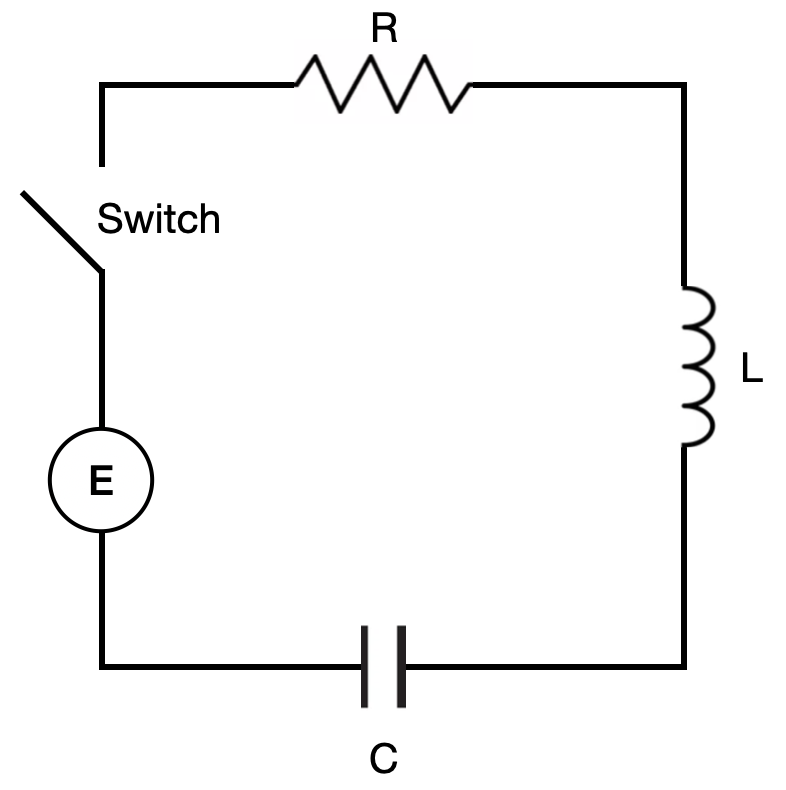

**12.1. (1 point)** Write down the ODE (in the correct units) using the constants and function defined above.

In [37]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from sympy import sin, cos
import scipy.integrate as sint

In [6]:
R = 40 # Ohm
L = 1  # Henry
C = 16 * 10**(-4)  # Farad

E = lambda t: 100 * cos(10*t)   #Volts

Q = sp.symbols("Q", cls = sp.Function)

t = sp.symbols("t")

diffeq = sp.Eq( L * Q(t).diff(t,2) + R * Q(t).diff(t) + Q(t)/C , E(t)  )

display(diffeq)

Eq(625.0*Q(t) + 40*Derivative(Q(t), t) + Derivative(Q(t), (t, 2)), 100*cos(10*t))

**12.2. (1 point)** Use sympy to find the analytical solution for $Q(t)$, and make a plot of $Q(t)$ vs. $t$. Does the circuit reach steady state?

In [7]:
# Solve the ODE:

result = sp.dsolve(diffeq, Q(t), ics = {Q(0):0,Q(t).diff(t).subs(t, 0): 0},simplify=True)
sol = result.rhs
#print(sol)
display(result)

Eq(Q(t), (-0.221903395504543*sin(15.0*t) - 0.12051649928264*cos(15.0*t))*exp(-20.0*t) + 0.0918220946915352*sin(10.0*t) + 0.12051649928264*cos(10.0*t))

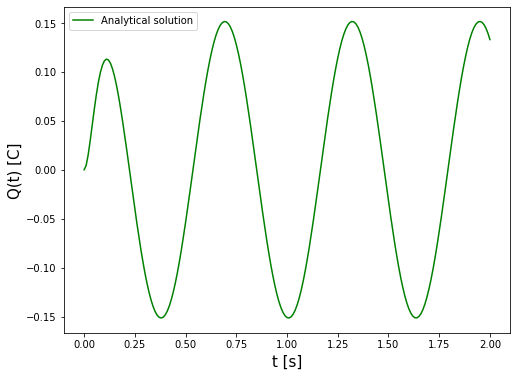

In [16]:
charge = lambda t: (-0.221903395504543*np.sin(15.0*t) - 0.12051649928264*np.cos(15.0*t))*np.exp(-20.0*t) + 0.0918220946915352*np.sin(10.0*t) + 0.12051649928264*np.cos(10.0*t)

# Step size:
h_1 = 0.01

# t axis
t_1 = np.arange(0, 2 + h_1, h_1)

# Plot:

plt.figure(figsize = (8,6))

plt.plot(t_1, charge(t_1), "g", label = "Analytical solution")

plt.xlabel('t [s]', size=15)
plt.ylabel('Q(t) [C]', size=15)

#plt.xlim(0,2.0)
#plt.ylim(0,1.1)

plt.legend()
plt.show()

**12.3. (1 point)** Reduce the order of the ODE to first order, and write down the relevant explicit, implicit and trapezoidal Euler matrix equations. Hint: First define $S(t)$ and find $\frac{dS}{dt}$, then substitute into the explicit, implicit and trapezoidal Euler formulae reviewed in class.

First we are going to convert the second order ODE into a 1st order ODE system 

We are going to consider the following change of variables:

$$Q'(t) = v(t) $$

which gives us

$$v'(t) =  \frac{1}{L}\left(E(t) - R v(t) - \frac{Q(t)}{C}\right)$$

resulting in the following matrix (system of ODEs) 

$$\frac{dS(t)}{dt} = \left[\begin{array}{cc}
0 & 1 \\
- \frac{1}{C L} & -\frac{R}{L}
\end{array}\right]S(t) +  \left[\begin{array}{cc}
 0 \\
\frac{E}{L}
\end{array}\right]$$

where $S(t) = \left[\begin{array}{c} Q(t) \\ v(t) \end{array}\right]$


Now $ F(t_j, S(t_j))$ will be:

$$
F(t_j, S(t_j)) =\left[\begin{array}{cc}
0 & 1 \\
- \frac{1}{C L} & -\frac{R}{L}
\end{array}\right]S(t) +  \left[\begin{array}{cc}
 0 \\
\frac{E}{L}
\end{array}\right].
$$


Plugging into the explicit Euler Formula, we get the following:

$$
S(t_{j+1}) = S(t_j) + h \left(\left[\begin{array}{cc}
0 & 1 \\
- \frac{1}{C L} & -\frac{R}{L}
\end{array}\right]S(t) +  \left[\begin{array}{cc}
 0 \\
\frac{E}{L}
\end{array}\right] \right) = \left[\begin{array}{cc}
1 & 0 \\
0 & 1
\end{array}\right]S(t_j) + h\left[\begin{array}{cc}
0 & 1 \\
- \frac{1}{C L} & -\frac{R}{L}
\end{array}\right]S(t_j) + h \left[\begin{array}{cc}
 0 \\
\frac{E}{L}
\end{array}\right] = \left[\begin{array}{cc}
1 & h \\
- \frac{h}{C L} & 1 - \frac{h R}{L}
\end{array}\right]S(t_j) + h \left[\begin{array}{cc}
 0 \\
\frac{E}{L}
\end{array}\right]
$$


Using the same approach we continue with the expression for the Implicit Euler Formula:

$$
\left[\begin{array}{cc}
1 & -h \\
\frac{gh}{l} & 1
\end{array}\right]S(t_{j+1}) = S(t_j),
$$

Finally for the trapezoidal formula we get: 

$$
\left[\begin{array}{cc}
1 & -h \\
\frac{gh}{l} & 1
\end{array}\right]S(t_{j+1}) = S(t_j),
$$





**12.4. (1 point)** Implement the explicit, implicit and trapezoidal Euler methods to find numerical solutions for $Q(t)$.

In [17]:
# Here we define the initial solution S_0

s0 = np.array([[0], [0]])

### Explicit euler method

In [20]:
# Define the matrix that we are going to use

m_e = np.array([[1, h_1], [-h_1 / (C*L), 1 - (h_1*R/L)]]) 

# Empty vectors to fill in with solutions
s_e = np.zeros((len(t_1), 2))

# Add initial conditions
s_e[0, :] = s0.T

# Do integrations
for j in range(0, len(t_1)-1):
    s_e[j+1, :] = np.dot(m_e, s_e[j, :]) + np.array([0 , h_1*E / L])

TypeError: unsupported operand type(s) for *: 'float' and 'function'

In [24]:
print(np.array([0 , E]))

[0 <function <lambda> at 0x7fe1318c10e0>]


### Implicit euler method

In [ ]:
# Define the matrix that we are going to use

m_i = 

# Empty vectors to fill in with solutions
s_i = np.zeros((len(t), 2))

# Add initial conditions
s_i[0, :] = s0.T

# Do integrations
for j in range(0, len(t)-1):
    s_i[j+1, :] = np.dot(m_i, s_i[j, :])

### Trapezoidal method

**12.5. (1 point)** Make a plot of $Q(t)$ vs. $t$ comparing the numerical solutions with the analytical solution. Which method produces the best results?

In [ ]:
# Define the matrix that we are going to use

m_t = 

# Empty vectors to fill in with solutions
s_t = np.zeros((len(t), 2))

# Add initial conditions
s_t[0, :] = s0.T

# Do integrations
for j in range(0, len(t)-1):
    s_t[j+1, :] = np.dot(m_t, s_t[j, :])

In [ ]:
plt.figure(figsize = (8, 6))

plt.plot(t_1, charge(t_1), 'k', label='analytical solution')
plt.plot(t_1, s_e[:,0],'b-', label='explicit Euler')
plt.plot(t_1, s_i[:,0],'r:', label='implicit Euler')
plt.plot(t_1, s_t[:,0],'y-.', label='trapezoid Euler')

plt.legend()

plt.show()

### 13. (5 points) FFT method for fluid dynamics: 1D Shock waves

We wish to study the emergence of 1D shock waves in fluids. To do this we will modify our one-way wave equation to account for non-linear convection, i.e. we will consider that the speed of an initial Gaussian density perturbation $\rho(x, 0) = 4\,e^{-x^2}$ propagating across a periodic 1D domain is not constant, but a function of the density itself, so that our PDE becomes:

$$\frac{\partial \rho}{\partial t} + \rho\frac{\partial \rho}{\partial x} =0$$


As we see from the above equation, portions of $\rho$ with larger amplitudes will convect more rapidly, giving rise to wave steepening (i.e. to a discontinuity, which we call a **shock wave**). Without a diffusive term, the shock would become infinitely steep. Therefore, we add a diffusive (parabolic) term to our PDE so that the shock maintains a finite width. Our PDE then becomes:

$$\frac{\partial \rho}{\partial t} + \rho\frac{\partial \rho}{\partial x} =\alpha\frac{\partial^2 \rho}{\partial x^2}$$

where $\alpha$ is a diffusion constant.

**13.1. (1 point)** Create an appropriate domain and a reasonable time vector for the problem, and make a plot of the initial density profile.


(100,)


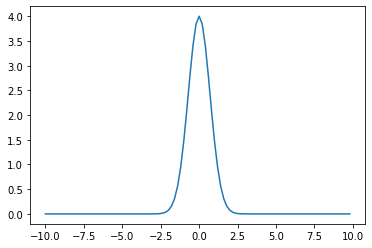

In [27]:
# Length of domain
L = 20

# Number of points 
N = 100

# Step size
delta_x = L/N

# X-axis vector

x = np.arange(-L/2, +L/2, delta_x)

# Time step
t_step = 0.025

m = 100

t = np.arange(0, m*t_step, t_step)

print(t.shape)


# Initial condition

rho_0 = 4*np.exp(-x**2)


# Plotting

plt.figure(figsize=(6,4))

plt.plot(x, rho_0)

plt.show()



**13.2. (2 point)** Find the solution, $\rho(x,t)$, **using the FFT method.** Hint: write a python function for the right-hand-side (RHS) of the PDE that allows you to map in and out of the Fourier domain at each time. Note that this PDE is non-linear, so the function should return the RHS in real space.


We are going to solve in terms of the time derivative since we just want to have the RHS in terms of the frequencies. The above gives us:

$$\frac{\partial \rho}{\partial t}  =\alpha\frac{\partial^2 \rho}{\partial x^2} - \rho\frac{\partial \rho}{\partial x}$$

In [51]:
# Wavemunbers - spatial frequencies:

k_numbers = 2*np.pi*np.fft.fftfreq(len(x), d=delta_x)


In [47]:
def RHS_ODE_spatial(rho_0, t, k_numbers, alp):
    
    # Initial condition to Fourier space
    rho_hat_0 = np.fft.fft(rho_0)
    
    # Factor in front of u_hat in Fourier space
    rhs_u_tilde = -(1j)*(k_numbers)*rho_hat_0**2 - alp*(k_numbers**2)*rho_hat_0 
    
    #Instead of c we write rho
    
    # Inverse FFT of the RHS
    rhs_u = np.fft.ifft(rhs_u_tilde).real
    
    # Back in Real Space
    rhs_ode = rhs_u
    
    return rhs_ode

In [52]:
A = RHS_ODE_spatial(rho_0, t, k_numbers, 0.1)

print(A.shape)

(100,)


**13.3. (1 point)** Feed a scipy ODE integrator with the function you created in the previous step. Hint: choose a reasonable value for the diffusion constant, $\alpha$, and make sure you feed the correct wavenumbers to the ODE integrator.


In [55]:
# Call ODE integrator

solution_spatial = sint.odeint(RHS_ODE_spatial, rho_0,\
                       t, args = (k_numbers, alp))

print(solution_spatial.shape)

(100, 100)


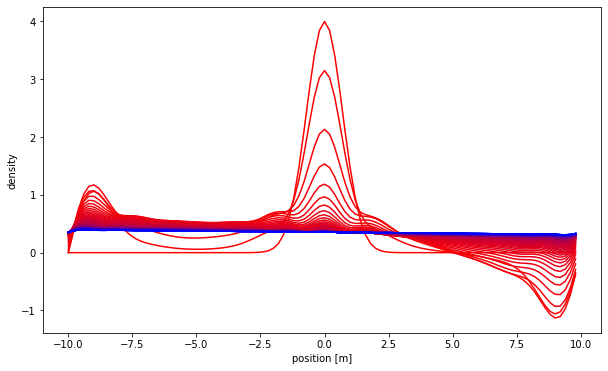

In [56]:
# Add colour

R = np.linspace(1, 0, m)
B = np.linspace(0, 1, m)
G = 0

plt.figure(figsize= (10, 6))

for j in range(0, m):
    plt.plot(x, solution_spatial[j, :], color = [R[j], G, B[j]])

plt.xlabel("position [m]")
plt.ylabel("density")

plt.show()

**13.4. (1 point)** Repeat the above calculations for two additional $\alpha$ values (one of them should be 0). Then, make a movie with three panels comparing the results for different $\alpha$ values and briefly discuss the role of this parameter in regulating the morphology of the shock wave.

In [ ]:
# Colors
R = np.linspace(1, 0, m)
B = np.linspace(0, 1, m)
G = 0
  
images = 120

for j in range(0,  images, 4):
    
    fig, axs = plt.subplots(3, 1, figsize=(30,30))
    
    #First Panel
    
    axs[0, 0].plot(x, solution_spatial[j, :], color = [R[j], G, B[j]])
    
    axs[0, 0].set_xlabel('x [cm]', size = 18)
    axs[0, 0].set_ylabel('T [°C]', size = 18)
    axs[0, 0].tick_params(axis = 'both', which = 'major', labelsize = 16)
    
    #Second Panel
    
    axs[1, 0].plot(x, T1[:, 2*it -1] , color = [R[j], G, B[j]])
    
    axs[1, 0].set_xlabel('x [cm]', size = 18)
    axs[1, 0].set_ylabel('T [°C]', size = 18)
    axs[1, 0].tick_params(axis = 'both', which = 'major', labelsize = 16)
    
    # Third Panel
    
    axs[2, 0].plot(x, T1[:, 2*it -1] , color = [R[j], G, B[j]])
    
    axs[2, 0].set_xlabel('x [cm]', size = 18)
    axs[2, 0].set_ylabel('T [°C]', size = 18)
    axs[2, 0].tick_params(axis = 'both', which = 'major', labelsize = 16)
    
    plt.savefig("./wave1D{:03d}.png".format(j))
    
    plt.close()